### Aesthetics

In [1]:
install.packages(c('ranger', 'ggplot2', 'data.table'), repos="http://cloud.r-project.org/")

Installing packages into 'C:/Users/Dan/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'colorspace', 'RColorBrewer', 'dichromat', 'munsell', 'labeling', 'Rcpp', 'gtable', 'plyr', 'reshape2', 'scales', 'chron'



package 'colorspace' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'dichromat' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'chron' successfully unpacked and MD5 sums checked
package 'ranger' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dan\AppData\Local\Temp\RtmpqkHH9M\downloaded_packages


In [ ]:
install.packages(c('Cairo'), repos="http://cloud.r-project.org/")

In [23]:
install.packages('DT', repos="http://cloud.r-project.org/")

Installing package into 'C:/Users/Dan/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'yaml', 'htmltools', 'htmlwidgets'



package 'yaml' successfully unpacked and MD5 sums checked
package 'htmltools' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'DT' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dan\AppData\Local\Temp\RtmpqkHH9M\downloaded_packages


In [2]:
# Some things to make our plots pretty
options(warn=-1)
library(scales)
my_alpha <- 0.4
point_color="#756bb1"
color_scale <- c(
  "#1f78b4", "#ff7f00", "#6a3d9a", "#33a02c", "#e31a1c", "#b15928",
  "#a6cee3", "#fdbf6f", "#cab2d6", "#b2df8a", "#fb9a99", "#ffff99")

# A quick introduction to ggplot2
 - Plotting library for R
 - "grammar of graphics"
 - Build plots piece by piece, e.g. you make a scatterplot as follows:
     - Make a plot of the diamonds dataset
     - Use caret as the x axis
     - Use price as the y axis
     - Add points to the plots

In [3]:
library(ggplot2)
data(diamonds)
set.seed(42)
diamonds <- diamonds[sample(1:nrow(diamonds), 5000),]
head(diamonds)

      carat       cut color clarity depth table price    x    y    z
49345  0.71 Very Good     H     SI1  62.5    60  2096 5.68 5.75 3.57
50545  0.79   Premium     H     SI1  61.8    59  2275 5.97 5.91 3.67
15434  1.03     Ideal     F     SI1  62.4    57  6178 6.48 6.44 4.03
44792  0.50     Ideal     E     VS2  62.2    54  1624 5.08 5.11 3.17
34614  0.27     Ideal     E     VS1  61.6    56   470 4.14 4.17 2.56
27998  0.30   Premium     E     VS2  61.7    58   658 4.32 4.34 2.67

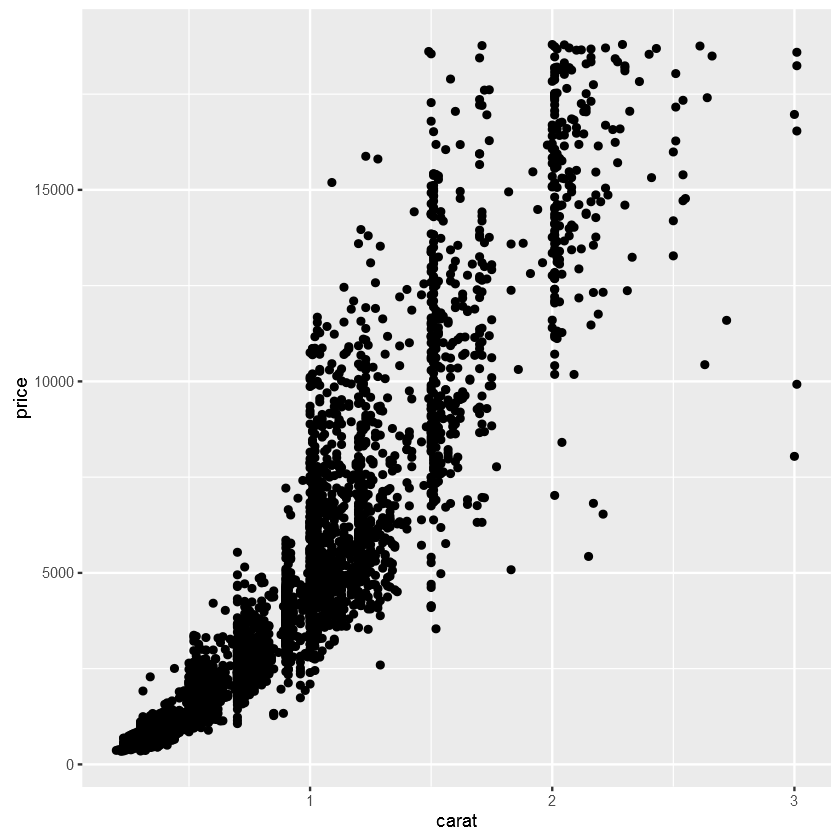

In [8]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

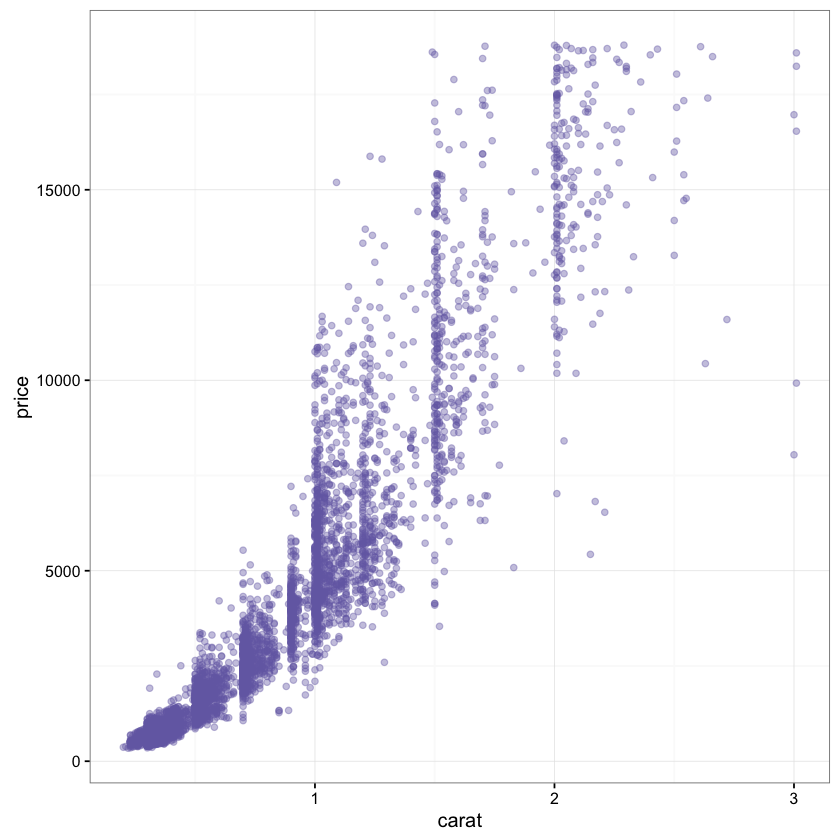

In [5]:
# Let's make our plot prettier: transparency (alpha), color, and a cleaner plot "theme"
# You can pass hex codes for color, or just name colors, e.g. "purple"
ggplot(diamonds, aes(x=carat, y=price)) + geom_point(alpha=my_alpha, color=point_color) + theme_bw()

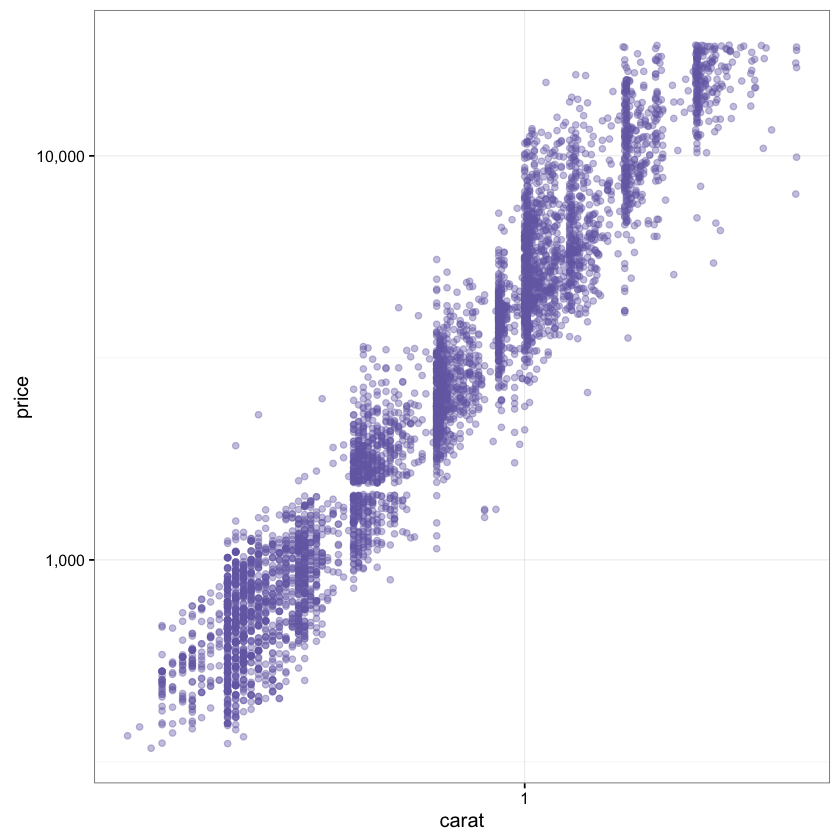

In [6]:
# Let's change the scales
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(alpha=my_alpha, color=point_color) + theme_bw() + 
    scale_y_log10(labels=scales::comma) + 
    scale_x_log10()

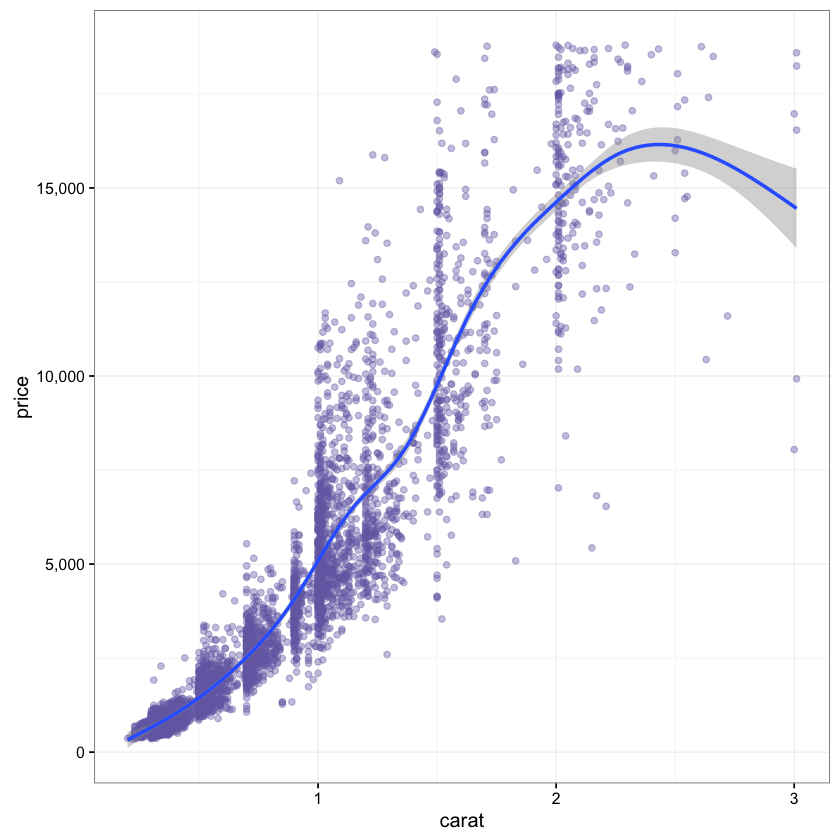

In [7]:
# Let's go back to the original scale and add a scatterplot smoother
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(alpha=my_alpha, color=point_color) + 
    scale_y_continuous(labels=scales::comma) + 
    geom_smooth() + 
    theme_bw()

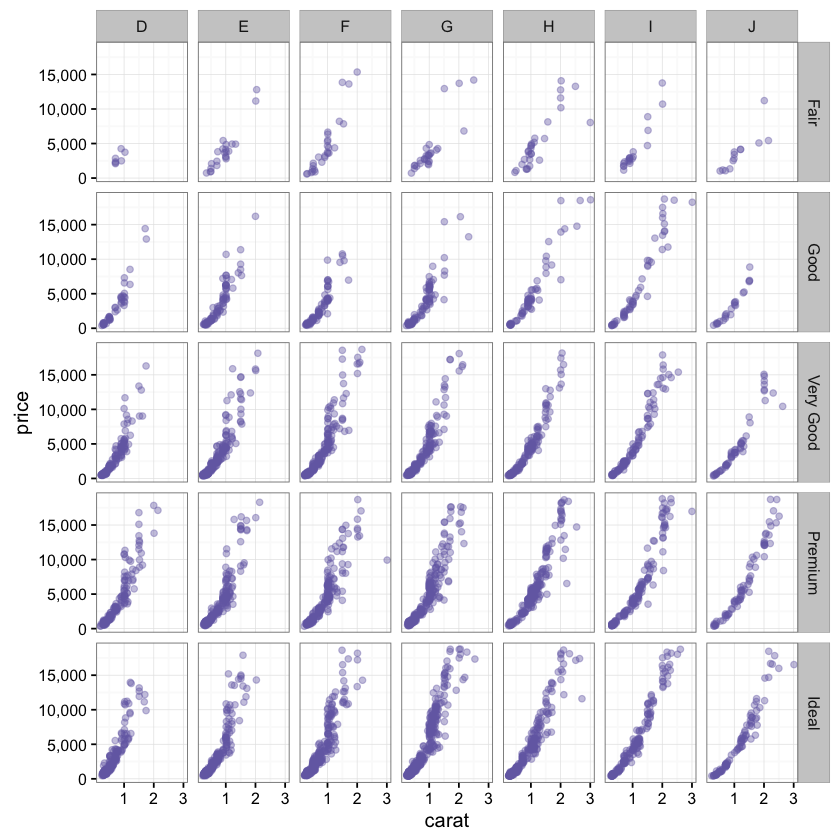

In [8]:
# Additionally, we can break the plot into panels by other variables
# Edward Tufte calls this "small multiples" and it's a very effective analytic plotting technique
ggplot(diamonds, aes(x=carat, y=price, col=clarity)) + 
    geom_point(alpha=my_alpha, color=point_color) + 
    scale_y_continuous(labels=scales::comma) + 
    theme_bw() + 
    facet_grid(cut ~ color)

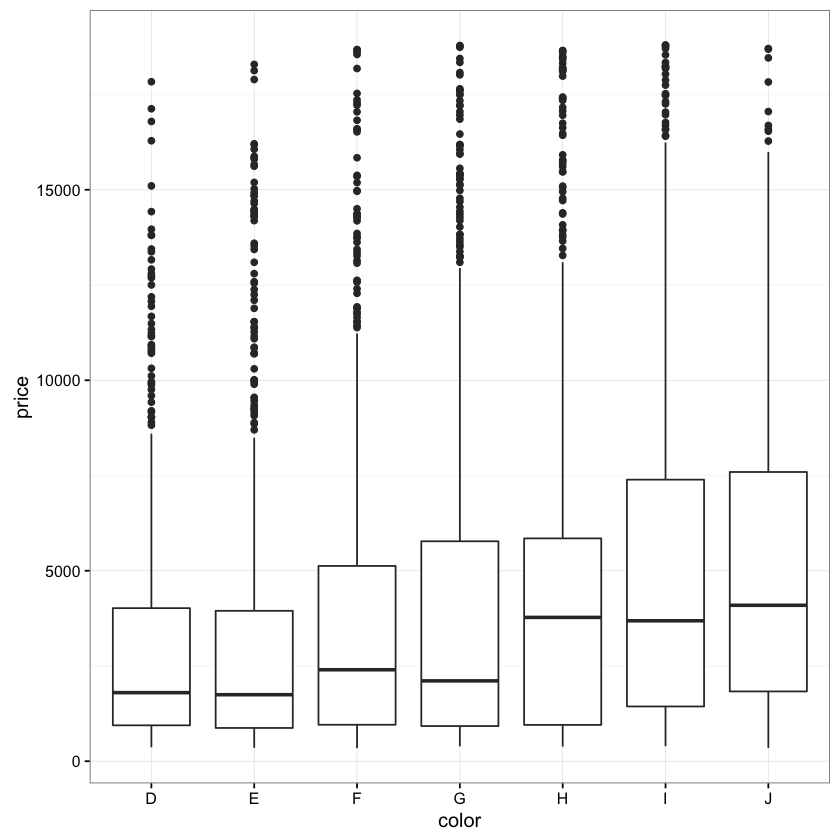

In [9]:
# I personally find scatterplots to be the most useful analytic plot
# Boxplots are very useful too:
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_boxplot() + 
    theme_bw()

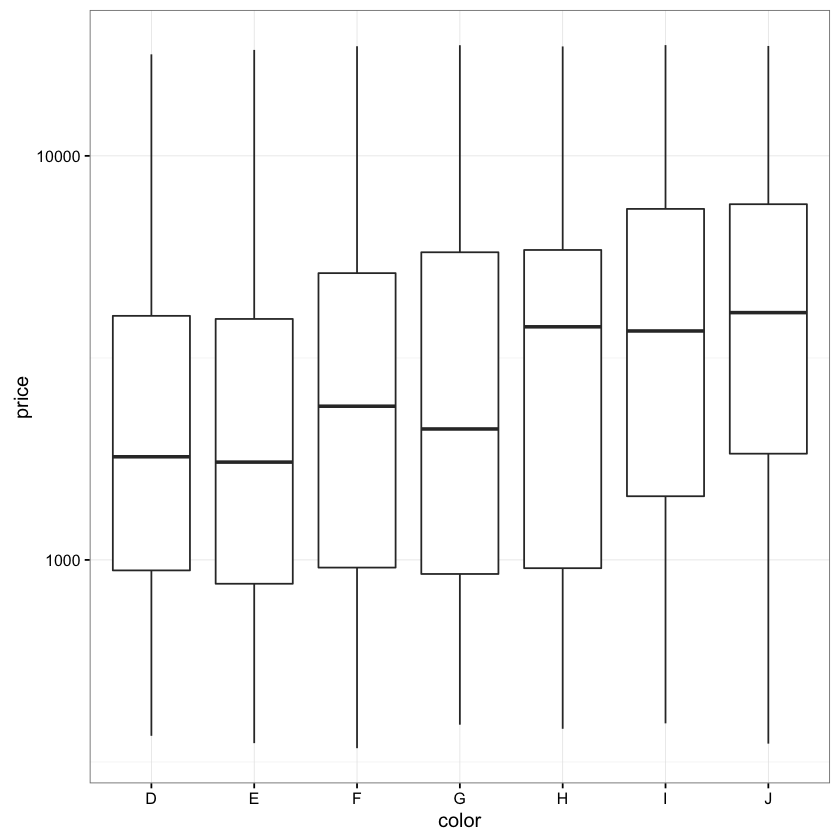

In [10]:
# You can use log scales with boxplots too
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_boxplot() + 
    scale_y_log10() + 
    theme_bw()

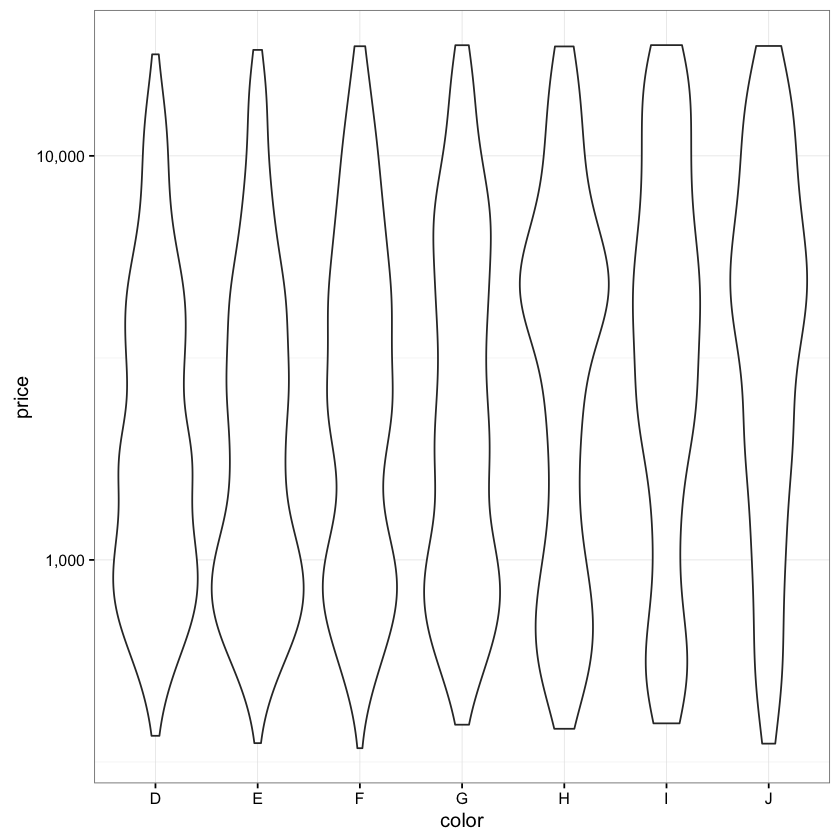

In [11]:
# Violin plots are a pretty alternative to boxplots
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_violin() + 
    theme_bw() + scale_y_log10(labels=scales::comma)

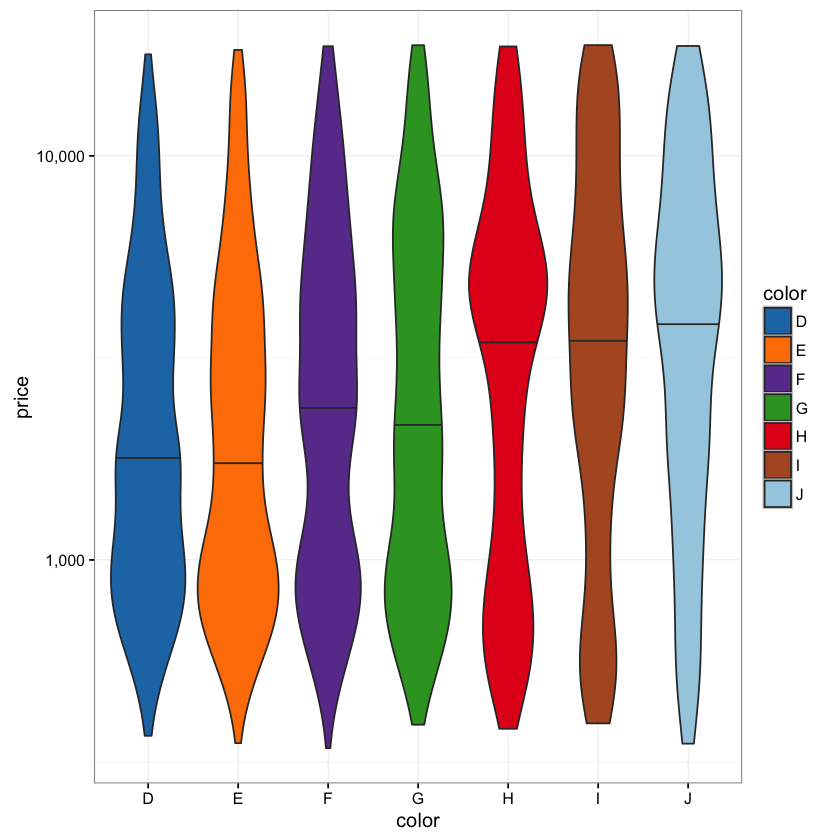

In [12]:
# We can add our own quantiles to violin plots and color them too
ggplot(diamonds, aes(x=color, y=price, fill=color)) + 
    geom_violin(draw_quantiles = c(0.50)) + 
    scale_fill_manual(values = color_scale) + 
    scale_y_log10(labels = scales::comma) +
    theme_bw()

### To Recap:
- Look at scatterplots first using geom_point()
- Add scatterplot smoothers using geom_smooth()
- Use facet_grid() to make small multiples by categorical variables
- Use boxplots to directly compare numeric variables across categories
- Use violin plots for prettier versions of box plots

# A quick introduction to data.table
- data.table is a lot like SQL
- Selection
- Aggregation
- Grouping


### data.table uses the same "[" operator as data.frame, with 2 major caveats:
- You don't need to use the "\$" sign syntax (e.g. you can just reference price, rather than diamonds$price)
- data.tables are "update on reference"

### data table syntax compared to SQL:
- dat["where clause", "select clause"]
- e.g. dat["which rows", "which columns"]
- e.g. select avg(price) from dat where carat=1
- is equivalent to dat[carat==1,mean(price)]

In [44]:
library(data.table)
dat <- data.table(diamonds)
dat[carat==1,mean(price)]

[1] 5317.442

### data table syntax compared to SQL:
- dat["where clause", "select clause", by="group by clause"]
- e.g. select avg(price) from dat where carat=1 group by cut
- is equivalent to dat[carat==1,mean(price),by='cut']

In [45]:
dat[carat==1, round(mean(price)), by='cut']

        cut   V1
1   Premium 5345
2     Ideal 6077
3 Very Good 5396
4      Fair 3900
5      Good 5214

### data table syntax compared to SQL:
- select avg(price) from dat where carat=1 group by cut order by 1 desc
- is equivalent to dat[carat==1,mean(price),by='cut'][order(V1, decreasing),]

In [34]:
(dd <- data.frame(x = 1:8, f = gl(2,4), ch = I(letters[1:8])))

x f ch
1 1 1  a
2 2 1  b
3 3 1  c
4 4 1  d
5 5 2  e
6 6 2  f
7 7 2  g
8 8 2  h

In [26]:
library(DT)
datatable(data, options = list(), class = "display", callback = JS("return table;"), 
    rownames, colnames, container, caption = NULL, filter = c("none", "bottom", 
        "top"), escape = TRUE, style = "default", width = "100%", fillContainer = getOption("DT.fillContainer", 
        FALSE), autoHideNavigation = getOption("DT.autoHideNavigation", FALSE), 
    selection = c("multiple", "single", "none"), extensions = list(), plugins = NULL)

ERROR: Error in datatable(data, options = list(), class = "display", callback = JS("return table;"), : unused arguments (width = "100%", fillContainer = getOption("DT.fillContainer", FALSE), autoHideNavigation = getOption("DT.autoHideNavigation", FALSE), plugins = NULL)


In [24]:
dat[carat==1, round(mean(price)), by='cut'][order(V1, decreasing=TRUE),]

        cut   V1
1     Ideal 6077
2 Very Good 5396
3   Premium 5345
4      Good 5214
5      Fair 3900

In [15]:
dat[carat==1, round(mean(price)), by='cut'][order(V1, decreasing=TRUE),]

cut   V1
1:     Ideal 6077
2: Very Good 5396
3:   Premium 5345
4:      Good 5214
5:      Fair 3900

### data table gives you the full power of the R language inside a SQL-like framework
- E.g. medians
- Linear regression
- And more!

In [56]:
dat[carat==1,round(median(price)),by='cut'][order(V1, decreasing=TRUE)]

        cut   V1
1     Ideal 5880
2   Premium 5340
3      Good 4872
4 Very Good 4658
5      Fair 3780

In [17]:
dat[,round(median(price)),by=list(cut, carat=round(carat))][order(V1, decreasing=TRUE),]

cut carat    V1
 1:      Good     3 18368
 2:     Ideal     3 17339
 3:   Premium     3 15498
 4: Very Good     3 12916
 5:     Ideal     2 12816
 6:   Premium     2 12674
 7: Very Good     2 12386
 8:      Fair     2 11406
 9:      Good     2 10471
10:      Fair     3  8044
11:   Premium     1  4234
12:      Good     1  3816
13: Very Good     1  3665
14:     Ideal     1  3336
15:      Fair     1  3025
16:      Fair     0   922
17:     Ideal     0   838
18:   Premium     0   802
19: Very Good     0   700
20:      Good     0   681

Look at the correlation between price and carat by cut. This shows that Good cuts have the highest correlaion between price and carat

In [18]:
dat[,round(cor(carat, price), 2),by='cut'] #test

cut   V1
1: Very Good 0.93
2:   Premium 0.93
3:     Ideal 0.93
4:      Good 0.94
5:      Fair 0.86

In [19]:
sink <- dat[,color := as.character(color)]
dat[,data.frame(round(t(coef(lm(price ~ carat + color))))),by='cut']

cut X.Intercept. carat colorE colorF colorG colorH colorI colorJ
1: Very Good        -2405  8204     17     17    -49   -575   -961  -1737
2:   Premium        -2227  8159    -86   -424   -213   -733  -1087  -1812
3:     Ideal        -2217  8510    -18     20     45   -751  -1123  -2050
4:      Good        -2214  7611    -43   -350   -160   -623   -443  -1482
5:      Fair        -2330  6389    189    976   -177   -432   -386  -1434

### Recap
- data.table is like SQL for R
- Fast and flexible
- Great for data munging

# Now lets look at a real data problem
- Don't worry too much about following along with the code
- We'll share the jupyter notebook after the presentation
- You can look at all the gory details then
- Focus on the big picture: the data and the problem to solve
- As data scientists, this is how we approach new (potentially messy) datasets

### Load the Data

The data.table and dplyr libraries are currently among the most popular tools for data munging.  You can work productively even without them, but if you haven't used them, we think you'll like the power they provide.  

In this tutorial, we will use data.table

In [51]:
library(data.table)
game_dat_raw <- fread("odsc_football_raw_data.csv")

### View the Data

In [52]:
head(game_dat_raw)

player_id          full_name position team week fanduel_points opponent
1 00-0019596          Tom Brady       QB   NE    1          27.62      PIT
2 00-0020712     James Harrison      OLB  PIT    1           0.00       NE
3 00-0022874        Josh Scobee        K   NO    1           8.00      PIT
4 00-0022900         Will Allen      UNK  UNK    1           0.00      PIT
5 00-0022924 Ben Roethlisberger       QB  PIT    1          17.04       NE
6 00-0023465       Heath Miller      UNK  UNK    1          12.40      PIT
  fumbles_lost fumbles_tot passing_att ... receiving_tds receiving_yac_yds
1            0           0          32 ...             0                 0
2            0           0           0 ...             0                 0
3            0           0           0 ...             0                 0
4            0           0           0 ...             0                 0
5            0           0          38 ...             0                 0
6            0           0           0 ...             0                30
  receiving_yds rushing_att rushing_loss rushing_loss_yds rushing_tds
1             0           3            0                0           0
2             0           0            0                0           0
3             0           0            0                0           0
4             0           0            0                0           0
5             0           0            0                0           0
6            84           0            0                0           0
  rushing_yds home_team away_team
1           1        NE       PIT
2           0        NE       PIT
3           0        NE       PIT
4           0        NE       PIT
5           0        NE       PIT
6           0        NE       PIT

This is information on a game-by-game basis. Why is this the wrong format for our data?
    
We want to forecast Fantasy football points from data available before the game... not from data available after the game occurred

### Loading Data in the Right Format

In [37]:
modeling_dat_raw <- fread("odsc_football_modeling_data.csv")
head(modeling_dat_raw)

player_id          full_name position team week fanduel_points opponent
1 00-0019596          Tom Brady       QB   NE    1          27.62      PIT
2 00-0020712     James Harrison      OLB  PIT    1           0.00       NE
3 00-0022874        Josh Scobee        K   NO    1           8.00      PIT
4 00-0022900         Will Allen      UNK  UNK    1           0.00      PIT
5 00-0022924 Ben Roethlisberger       QB  PIT    1          17.04       NE
6 00-0023465       Heath Miller      UNK  UNK    1          12.40      PIT
  home_team away_team prev_fanduel_points ... prev_rushing_att mean_rushing_att
1        NE       PIT                  NA ...               NA               NA
2        NE       PIT                  NA ...               NA               NA
3        NE       PIT                  NA ...               NA               NA
4        NE       PIT                  NA ...               NA               NA
5        NE       PIT                  NA ...               NA               NA
6        NE       PIT                  NA ...               NA               NA
  prev_rushing_loss mean_rushing_loss prev_rushing_loss_yds
1                NA                NA                    NA
2                NA                NA                    NA
3                NA                NA                    NA
4                NA                NA                    NA
5                NA                NA                    NA
6                NA                NA                    NA
  mean_rushing_loss_yds prev_rushing_tds mean_rushing_tds prev_rushing_yds
1                    NA               NA               NA               NA
2                    NA               NA               NA               NA
3                    NA               NA               NA               NA
4                    NA               NA               NA               NA
5                    NA               NA               NA               NA
6                    NA               NA               NA               NA
  mean_rushing_yds
1               NA
2               NA
3               NA
4               NA
5               NA
6               NA

Whoa.  What are all those unknowns? 

Let's look at where the data came from.

![Data came from storage that looked like this](nfldb.png)

In [38]:
mean(modeling_dat_raw$position == "UNK")

[1] 0.1669138

Says about 16.7% of players have position "Unknown"

Now what about those NA values? Let's review what each field means

In [58]:
dat <- modeling_dat_raw[week > 1,]  # see how many nas after week 1
mean(is.na(dat$mean_fanduel_points))

[1] 0.05196363

Why do we still have NA's?  Some players may have missed week 1.

In [64]:
dat <- dat[!is.na(prev_fanduel_points),]
mean(is.na(dat$mean_fanduel_points))

[1] 0

### Examine the distribution of fantasy points

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -4.10    0.00    0.00   23.79   13.55  385.60 

[1] 1696

10%   20%   30%   40%   50%   60%   70%   80%   90% 
 0.00  0.00  0.00  0.00  0.00  0.00  2.75 29.00 94.00

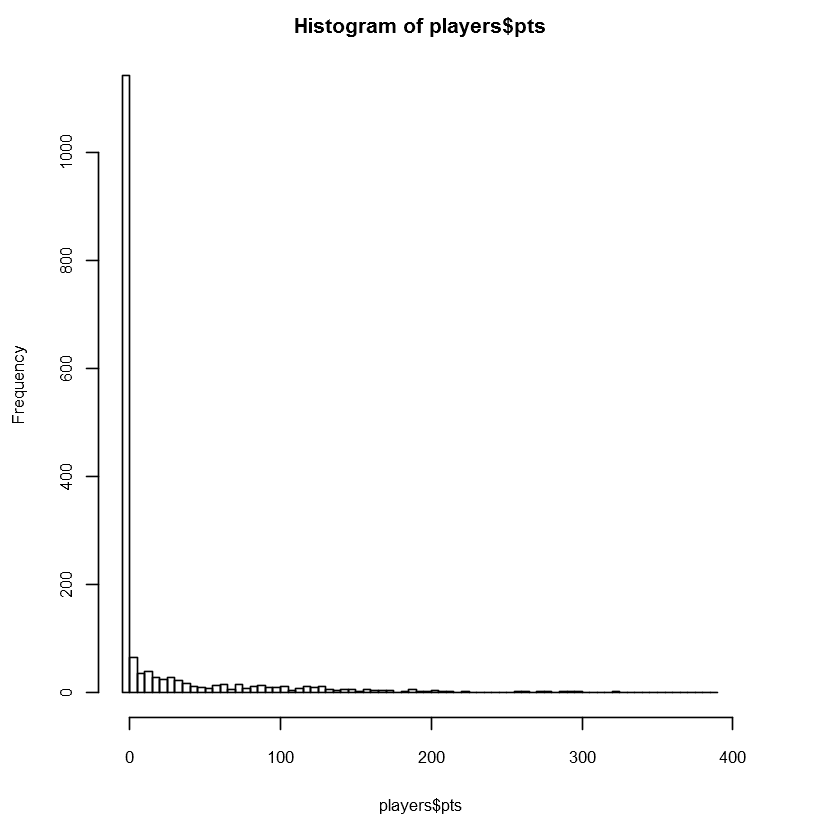

In [60]:
players <- dat[,list(pts = sum(fanduel_points)),by='player_id']
hist(players$pts, breaks=100)
summary(players$pts)
nrow(players)
quantile(players$pts, 1:9/10)

Interesting to see so many players with 0 Fantasy points. Are they all just benchwarmers?

In [61]:
dat[,table(position)]

position
   C   CB   DB   DE   DT   FB   FS    G  ILB    K   LB   LS  MLB   NT   OG  OLB 
 101 1047  667 1156  650  156  458  104  377  429  556   48  193  207   78 1043 
  OT    P   QB   RB   SS    T   TE  UNK   WR 
  67  415  449 1112  483  263  854 2452 1650 

Both benchwarmers and players in positions that we don't draft seem irrelevant. Filter those out.

In [62]:
players <- players[pts > 10,]
dat <- dat[player_id %in% players$player_id,]
dat[,table(position)]

position
  FB    K   QB   RB   TE  UNK   WR 
  97  414  416 1018  748  743 1518 

What do you expect the most useful predictors to be?

If we plot a scatterplot of fantasy points against that predictor, what do you expect the trend to be?

In [66]:
head(dat)

player_id      full_name position team week fanduel_points opponent
1 00-0010346 Peyton Manning      UNK  UNK    2          21.24      DEN
2 00-0023436     Alex Smith       QB   KC    2           7.14      DEN
3 00-0024313   Owen Daniels      UNK  UNK    2           3.40      DEN
4 00-0026213 Jamaal Charles       RB   KC    2          16.70      DEN
5 00-0026237 Andre Caldwell      UNK  UNK    2           1.10      DEN
6 00-0026739 Jordan Norwood       WR  DEN    2           2.90       KC
  home_team away_team prev_fanduel_points ... prev_rushing_att mean_rushing_att
1        KC       DEN                5.90 ...                1                1
2        KC       DEN               23.22 ...                9                9
3        KC       DEN                1.50 ...                0                0
4        KC       DEN               18.80 ...               16               16
5        KC       DEN                0.60 ...                0                0
6        KC       DEN                3.50 ...                0                0
  prev_rushing_loss mean_rushing_loss prev_rushing_loss_yds
1                 0                 0                     0
2                 0                 0                     0
3                 0                 0                     0
4                 0                 0                     0
5                 0                 0                     0
6                 0                 0                     0
  mean_rushing_loss_yds prev_rushing_tds mean_rushing_tds prev_rushing_yds
1                     0                0                0               -1
2                     0                0                0               15
3                     0                0                0                0
4                     0                0                0               57
5                     0                0                0                0
6                     0                0                0                0
  mean_rushing_yds
1               -1
2               15
3                0
4               57
5                0
6                0

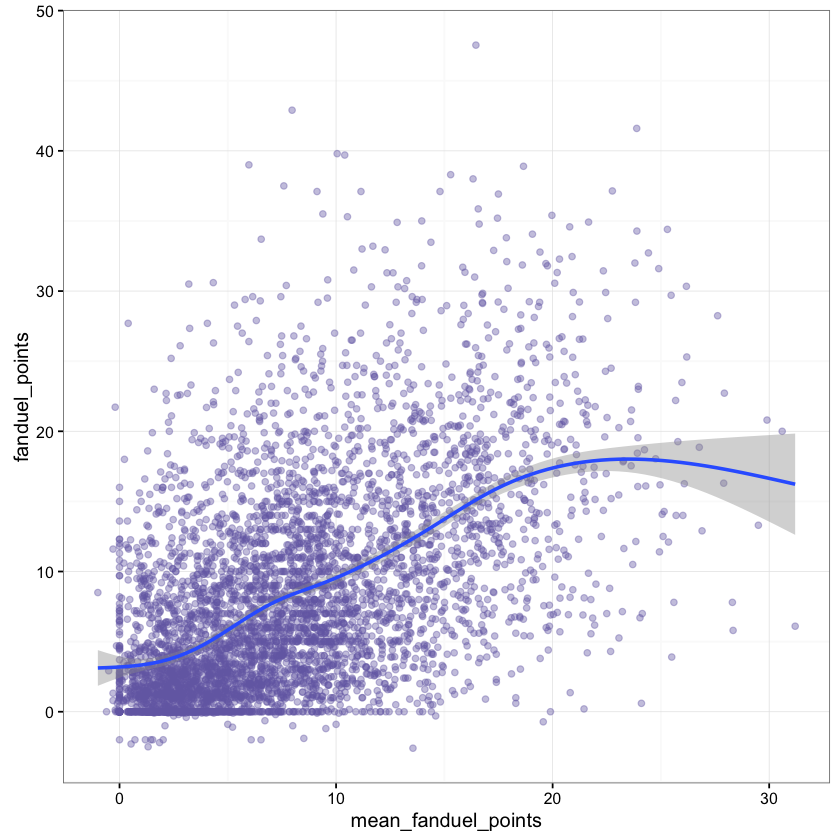

In [29]:
library(ggplot2)
ggplot(dat, aes(x=mean_fanduel_points, y=fanduel_points)) +
  geom_point(alpha=my_alpha, color=point_color) +
  geom_smooth() +
  theme_bw()

### Varying Levels of Data Reliability
Mean fanduel points is based on relatively little data early in the season, and it's based on a lot of data later in the season.  Does it become a more reliable predictor as the season progresses?

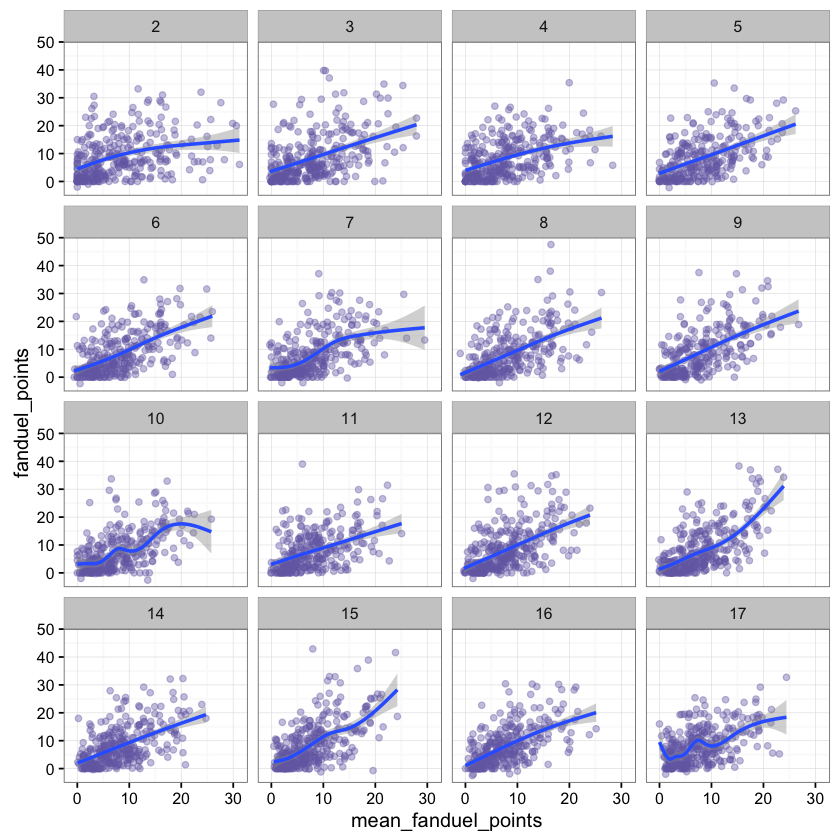

In [30]:
ggplot(dat, aes(x=mean_fanduel_points, y=fanduel_points)) +
  geom_point(alpha=my_alpha, color=point_color) +
  geom_smooth() +
  facet_wrap(~week) +
  theme_bw()

Hard to say it definitely is or definitely isn't getting better over time.

In [31]:
#Plot correlation between mean and actual over time
cors <- dat[,list(
  cor=cor(
    mean_fanduel_points,
    fanduel_points,
    use='pairwise.complete.obs')
), by='week']
cors

week       cor
 1:    2 0.3653507
 2:    3 0.4808873
 3:    4 0.4501952
 4:    5 0.5440401
 5:    6 0.5982969
 6:    7 0.5551925
 7:    8 0.5874313
 8:    9 0.6038516
 9:   10 0.5613743
10:   11 0.4702226
11:   12 0.5632245
12:   13 0.6576730
13:   14 0.5761800
14:   15 0.6193329
15:   16 0.6192242
16:   17 0.5204719

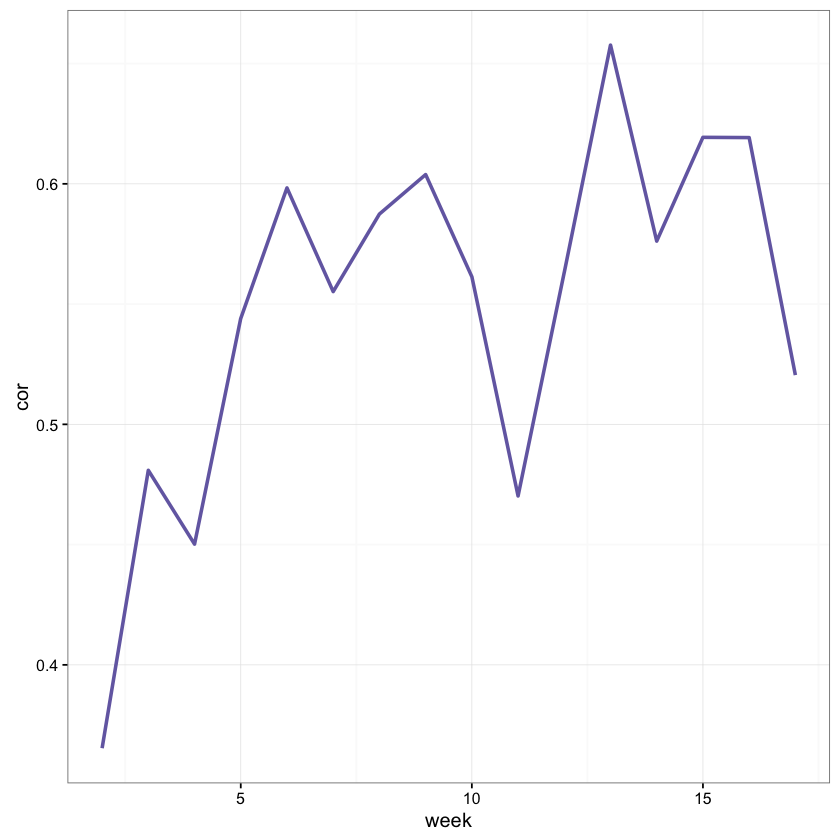

In [32]:
ggplot(cors, aes(x=week, y=cor)) +
  geom_line(color=point_color, size=1) +
  theme_bw()

It's jagged, but definitely sloping up.  There are lots of quantities, including sample means, that get more accurate in proportion to square root(n) as you get more observations.  Aside from the jaggedness, we see sort of that hyperbolic shape in this graph.

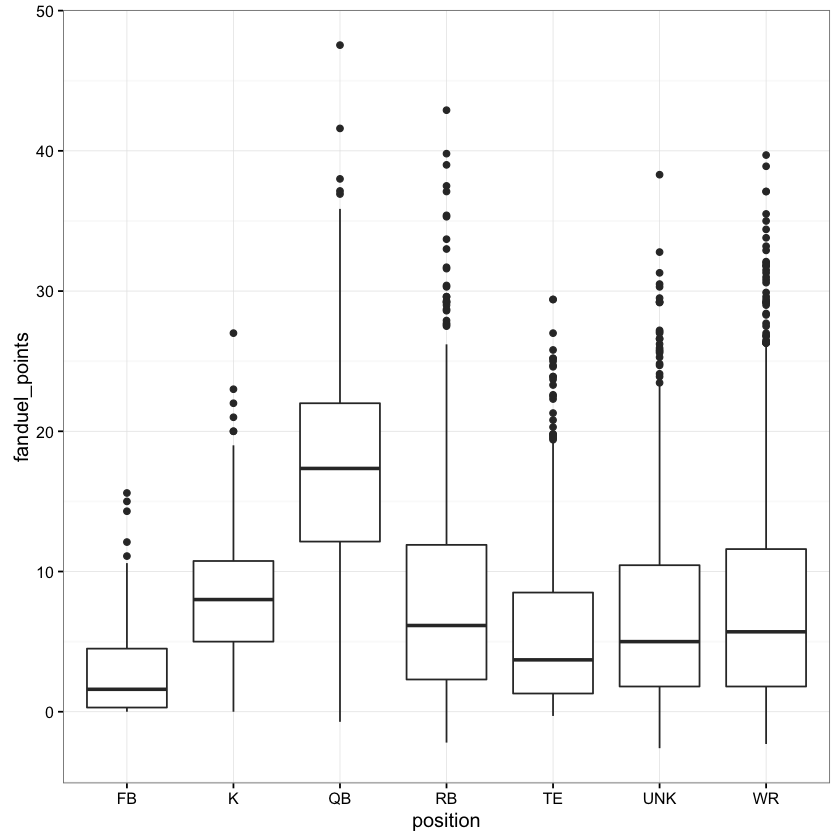

In [33]:
ggplot(dat, aes(x=position, y=fanduel_points)) +
  geom_boxplot() + theme_bw()

### Comparing Positions

QB's seem important. But many people will tell you not to draft your QB first.  Is there anything in this graph that suggests that advice is right or wrong?

Let's look at them a little more anyway.

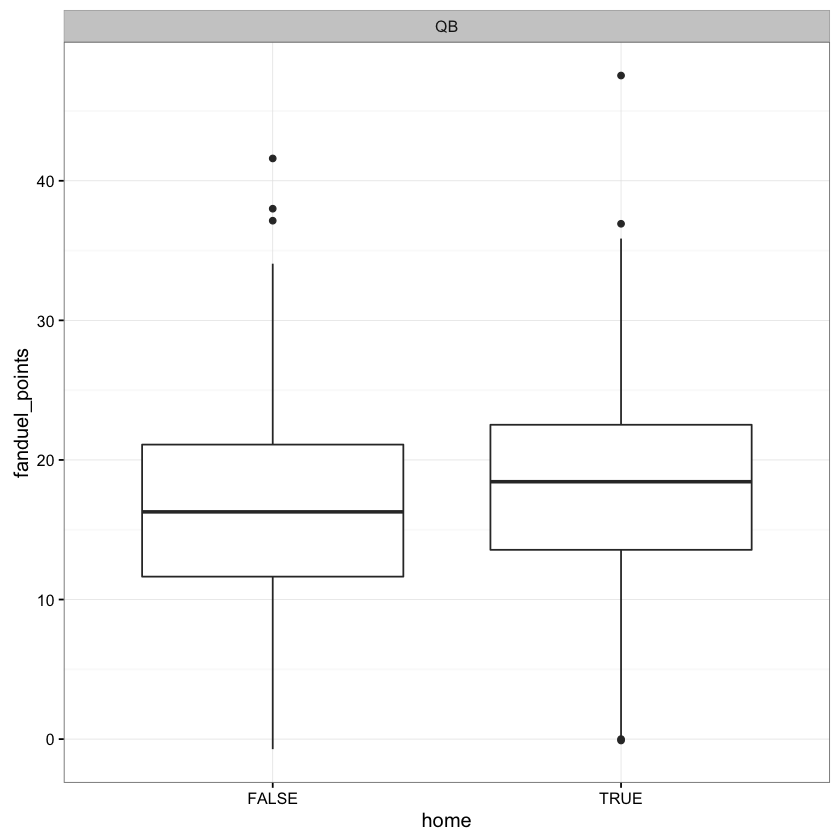

In [34]:
#QBs - boxplot
sink <- dat[,home := team == home_team]
ggplot(dat[position=='QB',], aes(x=home, y=fanduel_points)) +
  geom_boxplot() + theme_bw() + facet_wrap(~position)

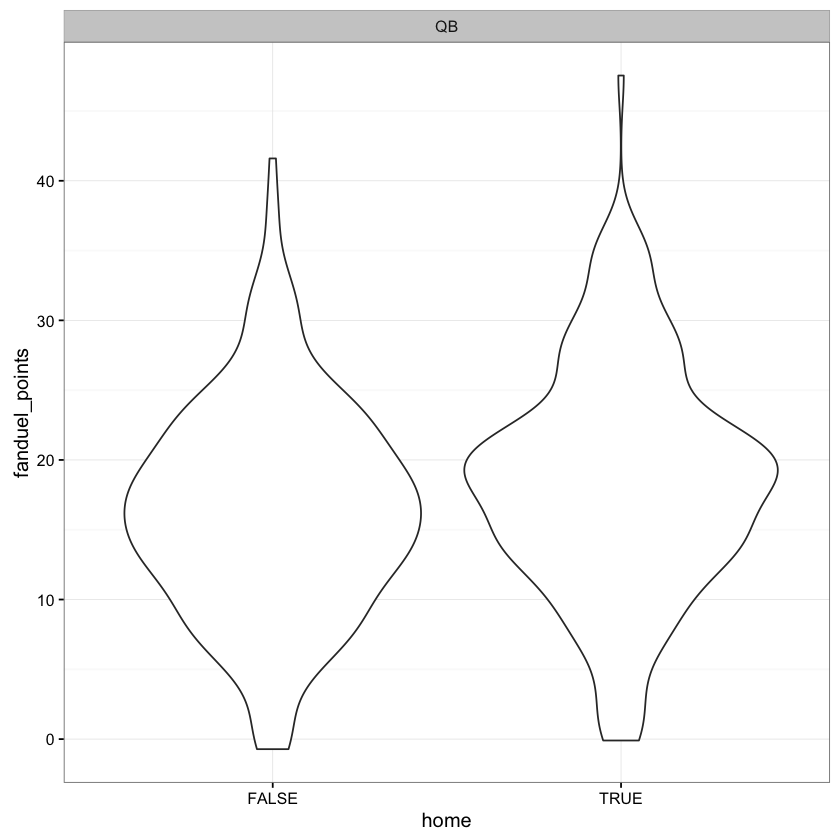

In [35]:
ggplot(dat[position=='QB',], aes(x=home, y=fanduel_points)) +
  geom_violin() + theme_bw() + facet_wrap(~position)


In [36]:
#QB cor with fanduel points
numeric_vars <- names(dat)[sapply(dat, is.numeric)]
numeric_vars <- setdiff(numeric_vars, c('fanduel_points', 'week'))
QBs <- dat[position == 'QB',]
cors <- cor(
  QBs$fanduel_points,
  QBs[,numeric_vars,with=F],
  use='pairwise.complete.obs')[1,]
head(sort(cors, decreasing=T), 10)

mean_fanduel_points           mean_passing_yds 
                 0.2761197                  0.2187207 
       prev_fanduel_points           mean_passing_tds 
                 0.2054693                  0.1996445 
  mean_passing_cmp_air_yds           prev_passing_yds 
                 0.1977981                  0.1961618 
          prev_rushing_att mean_passing_incmp_air_yds 
                 0.1918086                  0.1912371 
          mean_passing_att   prev_passing_cmp_air_yds 
                 0.1910561                  0.1898360

### Modeling Set Up

In [37]:
#Split train/test
train_weeks <- 2:13
test_weeks <- 14:17
train_indexes <- dat[,which(week %in% train_weeks)]
test_indexes <- dat[,which(week %in% test_weeks)]
train_dat <- dat[train_indexes,]
test_dat <- dat[test_indexes,]



### Linear Regression Model

In [38]:
xvars <- c('position', 'home', numeric_vars)
xvars <- paste(xvars, collapse=' + ')
model_formula <- paste('fanduel_points ~ ', xvars)
model_formula <- as.formula(model_formula)
model_lm <- lm(model_formula, train_dat)
#summary(model)
cfs <- coef(summary(model_lm))
cfs <- cfs[order(cfs[,4]),]
round(head(cfs, 10), 4)

Estimate Std. Error t value Pr(>|t|)
positionQB                   4.6091     1.1823  3.8985   0.0001
mean_passing_incmp_air_yds   0.0607     0.0178  3.4016   0.0007
prev_rushing_att             0.2439     0.0758  3.2183   0.0013
positionK                    3.3902     1.0929  3.1019   0.0019
mean_fanduel_points          0.3919     0.1265  3.0991   0.0020
mean_receiving_tar           0.4715     0.1734  2.7189   0.0066
homeTRUE                     0.5682     0.2233  2.5448   0.0110
mean_rushing_tds            -2.8774     1.1808 -2.4369   0.0149
mean_fumbles_lost            3.3186     1.4928  2.2231   0.0263
mean_receiving_yac_yds      -0.0451     0.0219 -2.0619   0.0393

### Random Forest Model

In [39]:
library(ranger)
set.seed(42)
model_rf <- ranger(
  model_formula, train_dat,
  write.forest=TRUE,
  importance='permutation')
head(sort(importance(model_rf), decreasing=TRUE), 10)



mean_fanduel_points     mean_receiving_tar     mean_receiving_rec 
             10.109377               8.293636               6.744917 
    mean_receiving_yds       mean_rushing_yds    prev_fanduel_points 
              6.457761               4.498324               4.344538 
      mean_rushing_att mean_receiving_yac_yds     prev_receiving_yds 
              4.088449               3.919993               3.305547 
      prev_rushing_att 
              3.093079

### Model Comparison

In [40]:
#Out of sample error
act <- test_dat$fanduel_points
pred_lm <- predict(model_lm, test_dat)
pred_rf <- predict(model_rf, test_dat)$predictions
print(sqrt(mean((pred_lm-act)^2)))
print(sqrt(mean((pred_rf-act)^2)))
plot_dat <- data.frame(
  act,
  pred_lm,
  pred_rf
)



[1] 5.740161
[1] 5.667609


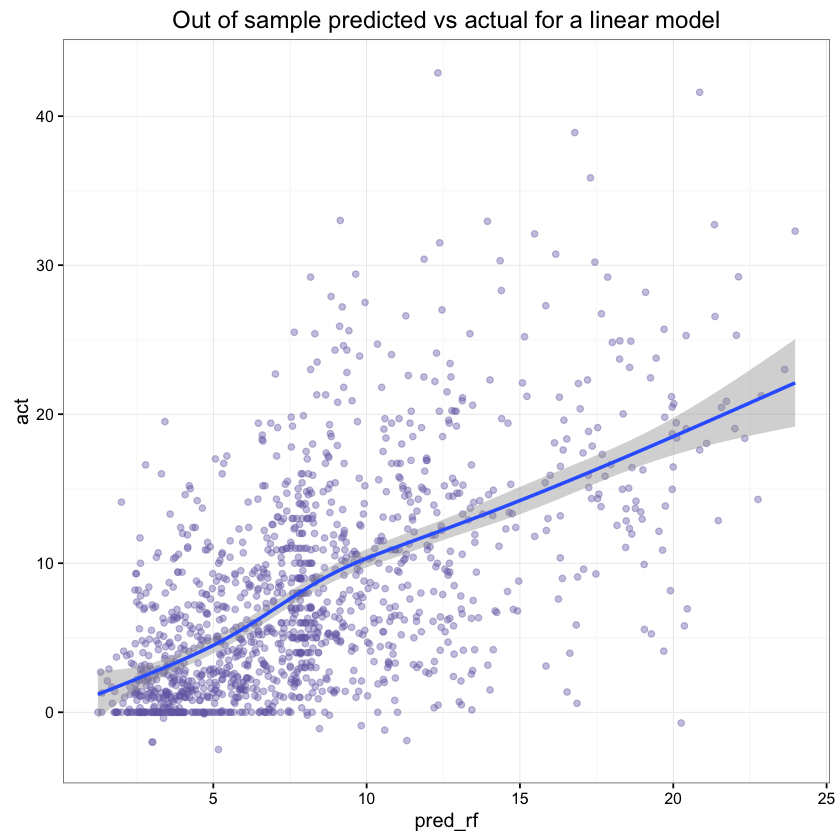

In [41]:
#Out of sample plots
ggplot(plot_dat, aes(x=pred_rf, y=act)) +
  geom_point(alpha=my_alpha, color=point_color) + geom_smooth() +
  ggtitle('Out of sample predicted vs actual for a linear model') +
  theme_bw()

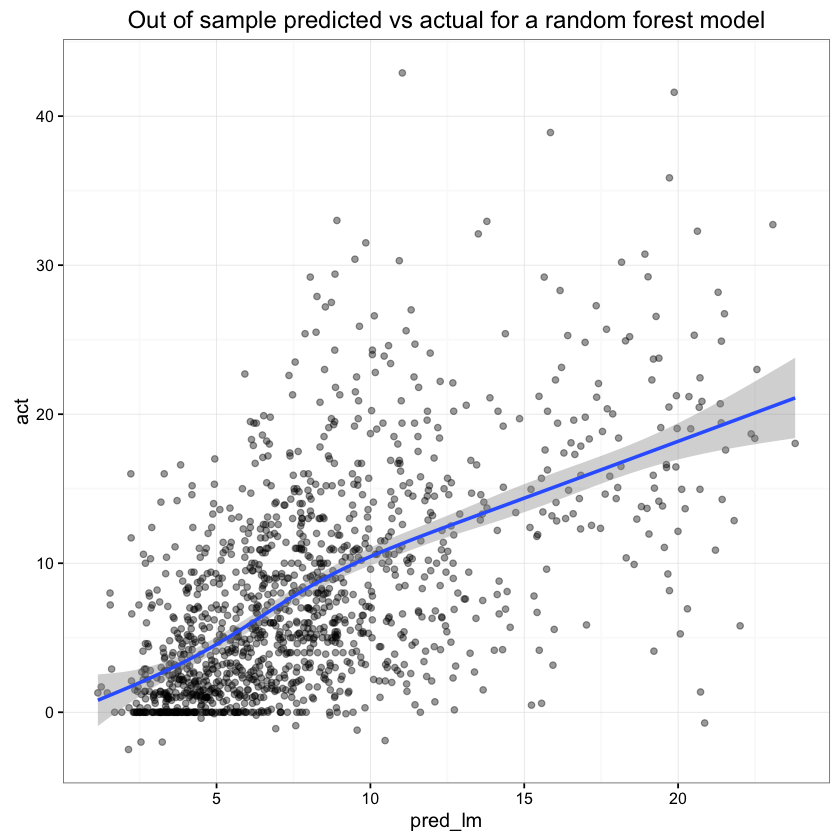

In [42]:
ggplot(plot_dat, aes(x=pred_lm, y=act)) +
  geom_point(alpha=my_alpha) + geom_smooth() +
  ggtitle('Out of sample predicted vs actual for a random forest model') +
  theme_bw()

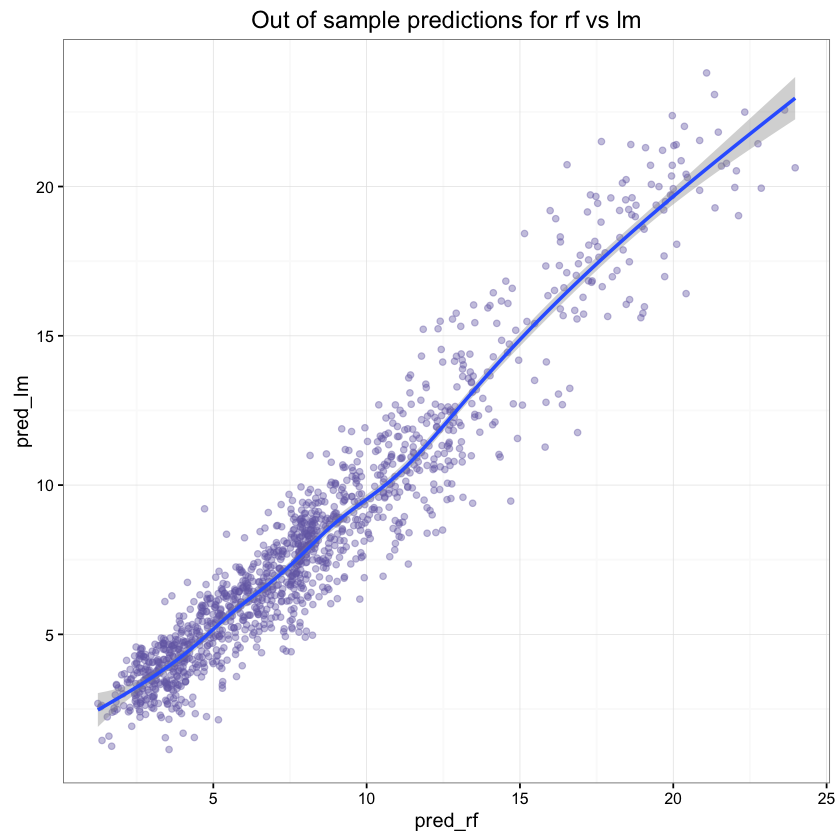

In [43]:
ggplot(plot_dat, aes(x=pred_rf, y=pred_lm)) +
  geom_point(alpha=my_alpha, color=point_color) + geom_smooth() +
  ggtitle('Out of sample predictions for rf vs lm') +
  theme_bw()

### Brainstorm things we can do to improve the model
So far, we are only considering what impact the offensive player has.  But defenses matter too.

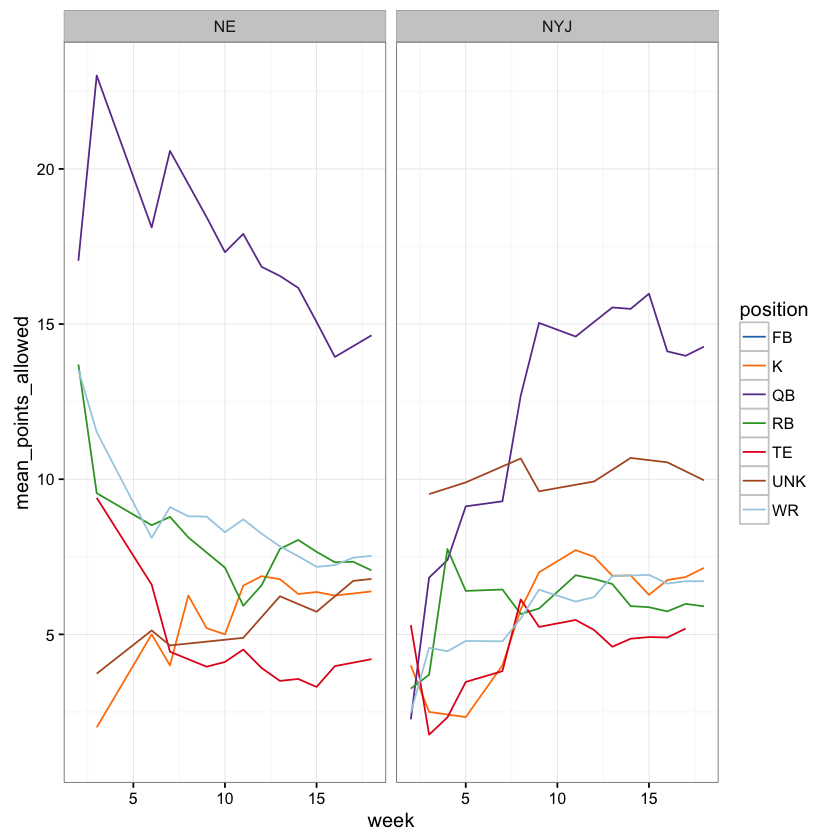

In [44]:
#Mean points allowed by week
pts_per_week <- modeling_dat_raw[player_id %in% players$player_id,list(
  fanduel_points = sum(fanduel_points),
  n=.N),
  by=c('week', 'position', 'opponent')]
setkeyv(pts_per_week, c('position', 'opponent', 'week'))
sink <- pts_per_week[,cumul_pts := cumsum(fanduel_points), by=c('position', 'opponent')]
sink <- pts_per_week[,cumul_n := cumsum(n), by=c('position', 'opponent')]
sink <- pts_per_week[,mean_points_allowed := cumul_pts / cumul_n]
pts_per_week <- pts_per_week[,list(week, position, opponent, mean_points_allowed)]
sink <- pts_per_week[,week := week + 1]
ggplot(pts_per_week[
  opponent %in% c('NE', 'NYJ')
  ], aes(x=week, y=mean_points_allowed, col=position)) +
  geom_line() + theme_bw() +
  facet_wrap(~opponent) + scale_colour_manual(values=color_scale)

Non-rolling join

In [45]:
dat2 <- merge(dat, pts_per_week, by=c('position', 'opponent', 'week'), all.x=TRUE)
summary(dat2$mean_points_allowed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   6.133   7.500   8.168   9.089  31.200    1236 

### Add to original data and re-run models

In [46]:
keys <- c('position', 'opponent', 'week')
setkeyv(dat, keys)
setkeyv(pts_per_week, keys)
dat2 <- pts_per_week[dat,,roll=TRUE,rollends=TRUE]
summary(dat2$mean_points_allowed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.933   7.433   8.037   9.100  31.200 

### Split the new data

In [47]:
train_weeks <- 2:13
test_weeks <- 14:17
train_indexes <- dat2[,which(week %in% train_weeks)]
test_indexes <- dat2[,which(week %in% test_weeks)]
train_dat <- dat2[train_indexes,]
test_dat <- dat2[test_indexes,]

### Linear model on new data

In [48]:
numeric_vars <- names(dat2)[sapply(dat2, is.numeric)]
numeric_vars <- setdiff(numeric_vars, c('fanduel_points', 'week', 'player_id'))
xvars <- c('position', 'home', numeric_vars)
xvars <- paste(xvars, collapse=' + ')
model_formula <- paste('fanduel_points ~ ', xvars)
model_formula <- as.formula(model_formula)
model_lm <- lm(model_formula, dat2[train_indexes,])
cfs <- coef(summary(model_lm))
cfs <- cfs[order(cfs[,4]),]
round(head(cfs, 10), 4)

Estimate Std. Error t value Pr(>|t|)
mean_points_allowed          0.1281     0.0378  3.3927   0.0007
mean_passing_incmp_air_yds   0.0600     0.0178  3.3692   0.0008
prev_rushing_att             0.2440     0.0757  3.2250   0.0013
mean_fanduel_points          0.3857     0.1263  3.0544   0.0023
mean_receiving_tar           0.4798     0.1732  2.7706   0.0056
homeTRUE                     0.5860     0.2230  2.6275   0.0086
positionK                    2.7248     1.1088  2.4575   0.0140
mean_rushing_tds            -2.8367     1.1791 -2.4057   0.0162
mean_fumbles_lost            3.3690     1.4907  2.2601   0.0239
positionQB                   2.7354     1.3033  2.0987   0.0359

In [49]:
#Random forest model
library(ranger)
set.seed(42)
model_rf <- ranger(
  model_formula, dat2[train_indexes,],
  write.forest=TRUE,
  importance='permutation')
head(sort(importance(model_rf), decreasing=TRUE), 10)

mean_fanduel_points     mean_receiving_tar     mean_receiving_rec 
             10.026256               8.525965               7.613141 
    mean_receiving_yds       mean_rushing_att       mean_rushing_yds 
              6.805836               4.275884               4.235873 
   prev_fanduel_points mean_receiving_yac_yds       prev_rushing_att 
              4.213352               3.795330               3.515134 
    prev_receiving_yds 
              2.828367

### Compare Models Again

In [50]:
#Out of sample error
act <- test_dat$fanduel_points
pred_lm <- predict(model_lm, test_dat)
pred_rf <- predict(model_rf, test_dat)$predictions
print(sqrt(mean((pred_lm-act)^2)))
print(sqrt(mean((pred_rf-act)^2)))
plot_dat <- data.frame(
  act,
  pred_lm,
  pred_rf
)

[1] 5.734832
[1] 5.678428


How did this happen?

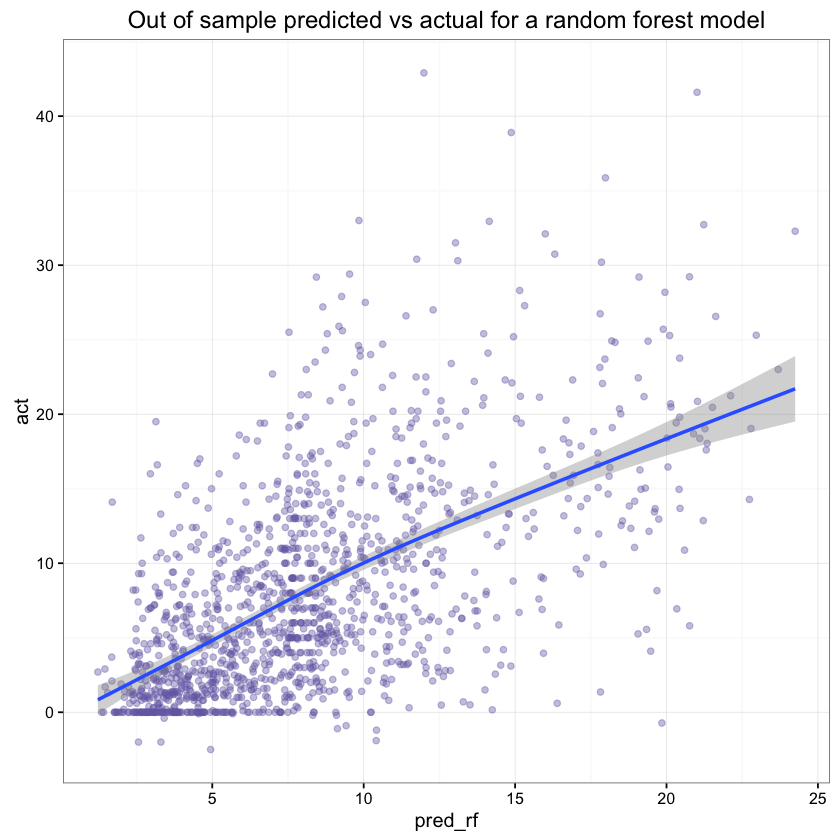

In [51]:
#Out of sample plots
ggplot(plot_dat, aes(x=pred_rf, y=act)) +
  geom_point(alpha=my_alpha, color=point_color) + geom_smooth() +
  ggtitle('Out of sample predicted vs actual for a random forest model') +
  theme_bw()

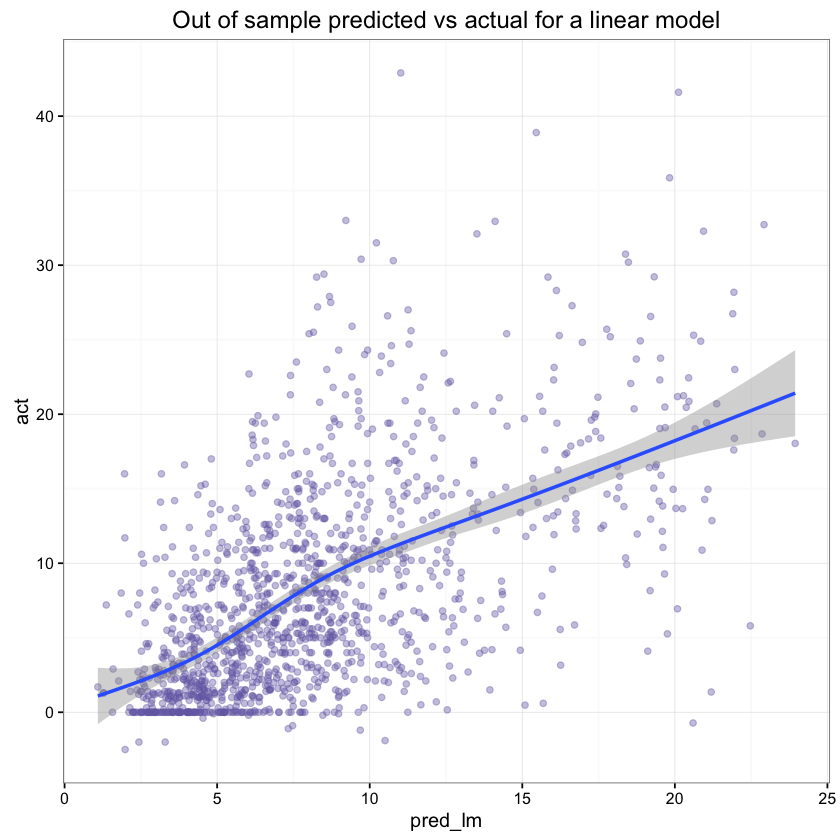

In [52]:
ggplot(plot_dat, aes(x=pred_lm, y=act)) +
  geom_point(alpha=my_alpha, color=point_color) + geom_smooth() +
  ggtitle('Out of sample predicted vs actual for a linear model') +
  theme_bw()

What are signs in this scatter that we have a good model?
What ideas to people have to improve this model?

### Draft Prioritization
Let's return to the question of what positions you should draft first

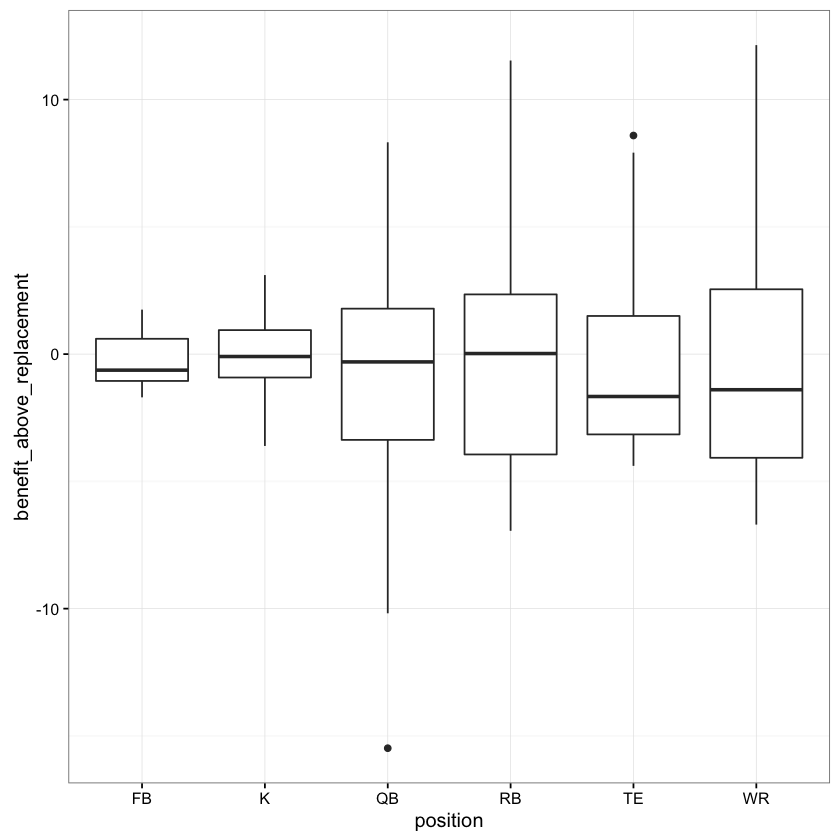

In [53]:
mean_by_player <- dat2[, list(player_points=mean(fanduel_points), games_played=.N), by=c('player_id', 'full_name', 'position')]
position_points <- dat2[, list(position_points=mean(fanduel_points)), by=c('position')]
player_position_comparison <- merge(mean_by_player, position_points, by='position')
sink <- player_position_comparison[,benefit_above_replacement := player_points - position_points]
player_position_comparison <- player_position_comparison[position != 'UNK',]
ggplot(player_position_comparison, aes(y=benefit_above_replacement, x=position)) + geom_boxplot() + theme_bw()

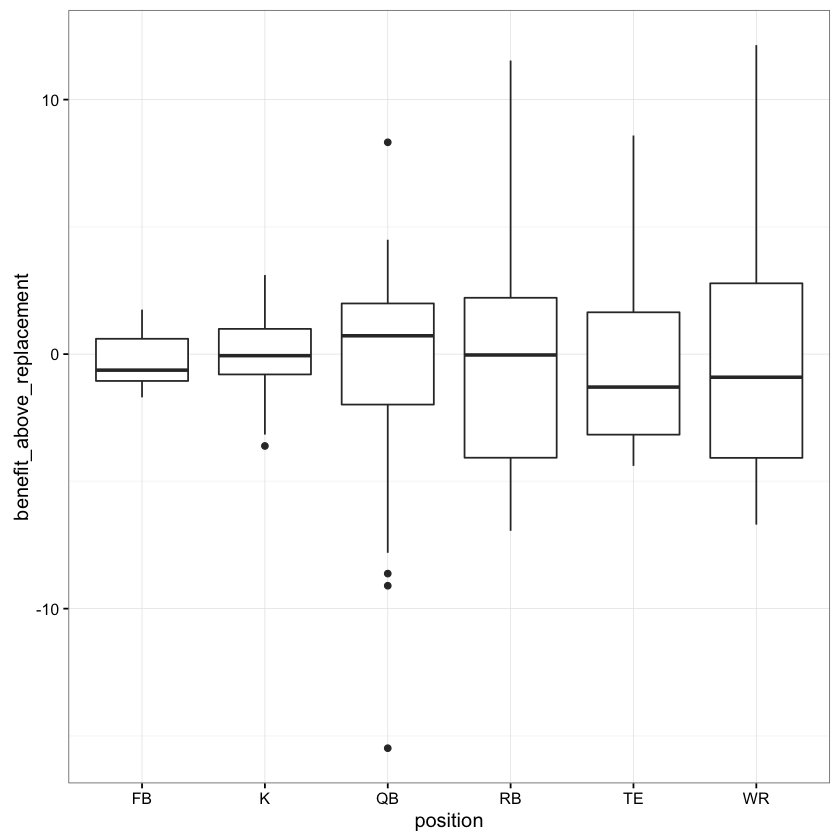

In [54]:
ggplot(player_position_comparison[games_played>5,], aes(y=benefit_above_replacement, x=position)) + geom_boxplot() + theme_bw()

In [55]:
player_position_comparison[benefit_above_replacement > 7,][order(benefit_above_replacement, decreasing=TRUE),]

position  player_id        full_name player_points games_played
 1:       WR 00-0027793    Antonio Brown      19.76000           15
 2:       RB 00-0031285  Devonta Freeman      19.58571           14
 3:       WR 00-0031235    Odell Beckham      18.87857           14
 4:       WR 00-0027944      Julio Jones      18.43333           15
 5:       WR 00-0024334 Brandon Marshall      17.96667           15
 6:       WR 00-0020337      Steve Smith      17.61667            6
 7:       RB 00-0026213   Jamaal Charles      17.95000            4
 8:       WR 00-0030564  DeAndre Hopkins      16.48667           15
 9:       TE 00-0030472      Jordan Reed      14.22308           13
10:       QB 00-0027939       Cam Newton      25.70533           15
11:       WR 00-0027150   Julian Edelman      15.73750            8
12:       WR 00-0031325    Sammy Watkins      15.73333           12
13:       TE 00-0027656   Rob Gronkowski      13.55000           14
14:       RB 00-0025394  Adrian Peterson      15.93333           15
15:       TE 00-0024389   Delanie Walker      13.25714           14
16:       WR 00-0029137   Alshon Jeffery      15.17500            8
17:       RB 00-0030496     Le'Veon Bell      15.30000            5
18:       WR 00-0028434     Doug Baldwin      14.86000           15
19:       WR 00-0030279     Keenan Allen      14.84286            7
20:       TE 00-0026281    Gary Barnidge      12.83333           15
21:       WR 00-0027942       A.J. Green      14.79333           15
22:       RB 00-0026289    Tim Hightower      15.16000            5
    position  player_id        full_name player_points games_played
    position_points benefit_above_replacement
 1:        7.619433                 12.140567
 2:        8.050530                 11.535184
 3:        7.619433                 11.259138
 4:        7.619433                 10.813900
 5:        7.619433                 10.347233
 6:        7.619433                  9.997233
 7:        8.050530                  9.899470
 8:        7.619433                  8.867233
 9:        5.634358                  8.588719
10:       17.383077                  8.322256
11:        7.619433                  8.118067
12:        7.619433                  8.113900
13:        5.634358                  7.915642
14:        8.050530                  7.882803
15:        5.634358                  7.622785
16:        7.619433                  7.555567
17:        8.050530                  7.249470
18:        7.619433                  7.240567
19:        7.619433                  7.223424
20:        5.634358                  7.198975
21:        7.619433                  7.173900
22:        8.050530                  7.109470
    position_points benefit_above_replacement